### 📈 Curvature Optimization

Once the spline is built:
- You must **replace the assumed boundary conditions** (like natural spline: second derivative = 0 at endpoints).
- Your goal is to **optimize** the spline such that the **total curvature is minimized**.
- This will result in a **smoother path**—which is desirable for autonomous vehicle trajectory planning.


### 🔍 What does Optimization mean here?
There are 3 parts to an optimization problem:
- Objective (or Cost) Function :
This is the function you want to minimize or maximize.
- Parameters (or Decision Variables):
These are the variables you are allowed to change in order to achieve the best value of the objective.
- Constraints:
These are the rules or limits that the parameters and/or the solution must satisfy.
In general, optimization means adjusting parameters to minimize or maximize an objective — like reducing cost, increasing speed, or in our case: minimizing curvature.

Here, you are given 4 fixed waypoints. Your goal is to interpolate these points using cubic splines, but with a twist:

refer to the first 3 videos of the following playlist for a better understanding:
[Video: Introduction to Curve Optimization](https://youtube.com/playlist?list=PLLK3oSbvdxFdF67yVxF_1FQO9SbBY3yTL&si=EMnkQ3Gb_EleDISu)

---
## 🎯 PROBLEM STATEMENT
You are given 4 discrete waypoints from the previous section. Your task is to interpolate these points using **cubic spline interpolation**, but with a focus on **optimizing the shape of the curve**.

Essentially, you are required to **minimize the total curvature** of the resulting spline by **varying the second derivative values at the boundaries**. This should be done **without using inbuilt spline functions** from libraries such as `scipy`. The goal is to find the **smoothest possible path** through the points, which would represent the **ideal trajectory** for a vehicle to follow. You may choose suitable bounds for the second derivative values and iterate through different combinations of boundary conditions to determine the configuration that leads to the **minimum total curvature**.

---

## Curvature Formula

The **curvature** $\kappa(t)$ of a 2D parametric curve $(x(t), y(t))$ is given by:

$$
\kappa(t) = \frac{ |x'(t)y''(t) - y'(t)x''(t)| }{ \left( (x'(t))^2 + (y'(t))^2 \right)^{3/2} }
$$

Where:
- $x'(t)$ and $y'(t)$ are the **first derivatives** with respect to the parameter $t$
- $x''(t)$ and $y''(t)$ are the **second derivatives**

---

## 📌 Deliverables

1. Your own implementation of cubic spline interpolation.
2. Plots of:
   - Original points
   - Interpolated spline without optimization
   - Interpolated spline with optimization
---

### 🌟 Optional Assignement

You may notice that directly finding the smoothest curve through waypoints seems inefficient and computationally expensive. Fortunately, mathematicians have developed robust optimization techniques that are readily available through libraries like `scipy.optimize`.

In this task, try enhancing the **cubic interpolation curve** you obtained earlier by finding an **optimal trajectory through the waypoints** — one that minimizes the curvature at every interpolated point. To do this, you can treat the **second derivatives at the curve’s boundaries** as variables to be optimized. Use `scipy` functions to perform this optimization and compare the resulting smooth curve to the original interpolation.

However, you may not notice an appreciable reduction in sharpness and a smoother, more natural path. What else can be done then for the **optimal raceline** for our car?

---

**Good luck!**  Let the paths be smooth and the math be satisfying!

In [143]:
import numpy as np
import matplotlib.pyplot as plt

In [144]:
def derivative(x,y):
    return np.diff(y)/np.diff(x)
def derivative2(x,der):
    return np.diff(der)/np.diff(x[:-1])
def curvature(x,y):
    return abs(derivative2(x,derivative(x,y)))/((1+derivative(x,y)**2)**1.5)[:-1]
def S1(x,coeffs):
    s=0
    for i in range(0,4):
       s+=coeffs[i]*x**(3-i)
    return s 
def S2(x,coeffs):
    s=0
    for i in range(4,8):
       s+=coeffs[i]*x**((3-i)%4)
    return s 
def S3(x,coeffs):
    s=0
    for i in range(8,12):
       s+=coeffs[i]*x**((11-i)%4)
    return s



In [128]:
x=[]
y=[]
valuex=np.array(list(eval(input("enter x values"))))
valuey=np.array(list(eval(input("enter y values"))))

In [145]:

variables=' [a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3]'
print(variables+"\n", matrix)

 [a1,b1,c1,d1,a2,b2,c2,d2,a3,b3,c3,d3]
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [146]:
def cubicspline(x, y, v1, v2):
    matrix = np.zeros((12, 12))

    for i in range(4):
        matrix[0][i] = x[0]**(3 - i)
        matrix[1][i] = x[1]**(3 - i)
        matrix[2][i + 4] = x[1]**(3 - i)
        matrix[3][i + 4] = x[2]**(3 - i)
        matrix[4][i + 8] = x[2]**(3 - i)
        matrix[5][i + 8] = x[3]**(3 - i)

        if 2 - i >= 0:
            matrix[6][i] = (3 - i) * x[1]**(2 - i)
            matrix[6][i + 4] = -(3 - i) * x[1]**(2 - i)
            matrix[8][i + 4] = (3 - i) * x[2]**(2 - i)
            matrix[8][i + 8] = -(3 - i) * x[2]**(2 - i)

        if 1 - i >= 0:
            matrix[7][i] = (3 - i) * (2 - i) * x[1]**(1 - i)
            matrix[7][i + 4] = -(3 - i) * (2 - i) * x[1]**(1 - i)
            matrix[9][i + 4] = (3 - i) * (2 - i) * x[2]**(1 - i)
            matrix[9][i + 8] = -(3 - i) * (2 - i) * x[2]**(1 - i)

    # Boundary conditions at the endpoints
    matrix[10][0] = 6 * x[0]
    matrix[10][1] = 2

    matrix[11][8] = 6 * x[3]
    matrix[11][9] = 2    

    rhs = np.zeros(12)
    rhs[0] = y[0]
    rhs[5] = y[3]
    rhs[1] = rhs[2] = y[1]
    rhs[3] = rhs[4] = y[2]
    rhs[10] = v1
    rhs[11] = v2

    coeffs = np.linalg.solve(matrix, rhs)

    x1 = np.linspace(x[0], x[1], 100)
    x2 = np.linspace(x[1], x[2], 100)
    x3 = np.linspace(x[2], x[3], 100)

    y1 = S1(x1, coeffs)
    y2 = S2(x2, coeffs)
    y3 = S3(x3, coeffs)

    x = np.concatenate((x1[:-1], x2[:-1], x3))
    y = np.concatenate((y1[:-1], y2[:-1], y3))  
    return x, y


In [177]:
learning_rate = 0.009
a=b=0
eps=1e-5

for i in range(100001):
    x, y = cubicspline(valuex, valuey, a, b)
    loss = np.sum(curvature(x, y))

    if (i%100==0): print (loss)   

    # Gradient wrt a
    x_eps_a, y_eps_a = cubicspline(valuex, valuey, a + eps, b)
    loss_a = np.sum(curvature(x_eps_a, y_eps_a))
    grad_a = (loss_a - loss) / eps

    # Gradient wrt b
    x_eps_b, y_eps_b = cubicspline(valuex, valuey, a, b + eps)
    loss_b = np.sum(curvature(x_eps_b, y_eps_b))
    grad_b = (loss_b - loss) / eps

    a -= learning_rate * grad_a
    b -= learning_rate * grad_b

    

81.69939113631352
79.56813336716604
79.22232895181529
78.87950100048583
78.53901079345837
78.20072894575448
77.8668404979598
77.54428715625113
77.22633621710219
76.91073045710564
76.59701181104984
76.28558351442997
75.97652491407575
75.66909205096309
75.36335103426288
75.05953995141797
74.75808241218145
74.45866129416572
74.16120796784617
73.86591256260829
73.5723455985767
73.28123691986588
72.99200887245394
72.70481012011294
72.41927483842997
72.13738412239078
71.86704808350585
71.59834965848371
71.33155649072773
71.06674250242843
70.8034927691557
70.54206385048766
70.28191291493675
70.0234852943053
69.767086060324
69.5122682482318
69.2589823234888
69.00754063042007
68.75756421167593
68.50895830101499
68.26202167917506
68.01662894475092
67.77266190398868
67.53256420839952
67.30213036347229
67.07333254122113
66.84589652305249
66.61955757733793
66.39474841478342
66.17079373739233
65.94857621649754
65.7277861487454
65.50819292480989
65.29006189385478
65.07321178761654
64.85739450048044
6

[-1.80300219e-13  5.62713661e-04  1.12506351e-03  1.68670562e-03
  2.24729607e-03  2.80649095e-03  3.36394632e-03  3.91931827e-03
  4.47226288e-03  5.02243622e-03  5.56949437e-03  6.11309341e-03
  6.65288942e-03  7.18853848e-03  7.71969666e-03  8.24602004e-03
  8.76716471e-03  9.28278673e-03  9.79254219e-03  1.02960872e-02
  1.07930777e-02  1.12831700e-02  1.17660200e-02  1.22412838e-02
  1.27086175e-02  1.31676772e-02  1.36181190e-02  1.40595989e-02
  1.44917730e-02  1.49142975e-02  1.53268283e-02  1.57290215e-02
  1.61205333e-02  1.65010197e-02  1.68701368e-02  1.72275407e-02
  1.75728874e-02  1.79058330e-02  1.82260336e-02  1.85331454e-02
  1.88268242e-02  1.91067263e-02  1.93725077e-02  1.96238245e-02
  1.98603328e-02  2.00816886e-02  2.02875481e-02  2.04775672e-02
  2.06514022e-02  2.08087090e-02  2.09491437e-02  2.10723625e-02
  2.11780213e-02  2.12657763e-02  2.13352836e-02  2.13861992e-02
  2.14181793e-02  2.14308798e-02  2.14239568e-02  2.13970665e-02
  2.13498650e-02  2.12820

<function matplotlib.pyplot.show(close=None, block=None)>

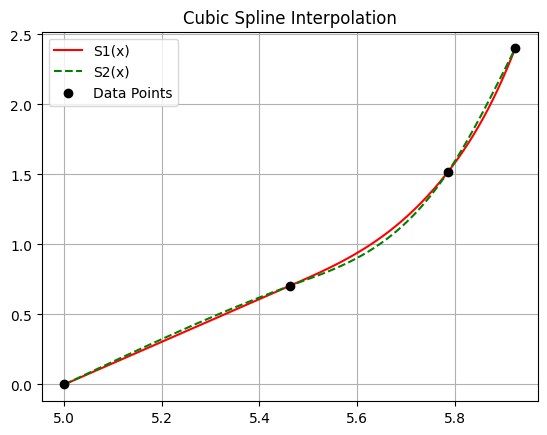

In [170]:
x2,y2=cubicspline(valuex,valuey,0,0)
print(y2-y)
print ("original curvature sum:", np.sum(curvature(x2,y2)), "\n")
print ("new curvature sum:", np.sum(curvature(x,y)), "\n")
plt.plot(x, y, label='S1(x)', color='red')
plt.plot(x2, y2, linestyle='--', label='S2(x)', color='green')

plt.scatter(valuex, valuey, color='black', zorder=5, label='Data Points')
plt.title("Cubic Spline Interpolation")
plt.legend()
plt.grid (True)
plt.show